## Correlation Analysis for Prototype 03

In this correlation analysis and PCA the decision and afterstate datasets are investigated combined

In [1]:
import os
import pandas as pd

from fast_ml.feature_selection import get_constant_features
 
decision_states_dataset = pd.DataFrame()

directory = "../data_sets/decision_state_samples"
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(filepath):
        sub_dataset = pd.read_csv(filepath)
        decision_states_dataset = pd.concat([decision_states_dataset, sub_dataset], axis=0)        

In [2]:
print(decision_states_dataset.shape)

(32547, 100)


In [3]:
import os
import pandas as pd

from fast_ml.feature_selection import get_constant_features
 
after_states_dataset = pd.DataFrame()

directory = "../data_sets/after_state_samples"
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(filepath):
        sub_dataset = pd.read_csv(filepath)
        after_states_dataset = pd.concat([after_states_dataset, sub_dataset], axis=0)    

In [4]:
print(after_states_dataset.shape)

(71600, 100)


In [5]:
dataset = pd.concat([decision_states_dataset, after_states_dataset], axis=0)

In [6]:
# Count the number of cells with NaN value in the dataset
dataset.isna().sum().sum()

77

In [7]:
# Drop all rows with Nan value
dataset = dataset.dropna();

In [8]:
# 3 Status Features
time_status_columns = ['time', 'timestamp', 'seconds']
try:
    dataset.drop(time_status_columns, inplace=True, axis=1)
except:
    print("All time status features are removed from the dataset")
assert len(dataset.columns) == 97

In [9]:
constant_features = set(get_constant_features(dataset, threshold=0.99, dropna=False)['Var'])
print(constant_features)
try:
    dataset.drop(constant_features, inplace=True, axis=1)
except:
    print("All constant features are removed from the dataset")
assert len(dataset.columns) == 85

{'tasksStopped', 'udp:udp_fail_queue_rcv_skb', 'cpuHardIrq', 'alarmtimer:alarmtimer_fired', 'dma_fence:dma_fence_init', 'cachefiles:cachefiles_create', 'clk:clk_set_rate', 'cpuNice', 'cachefiles:cachefiles_mark_active', 'connectivity', 'cachefiles:cachefiles_lookup', 'alarmtimer:alarmtimer_start'}


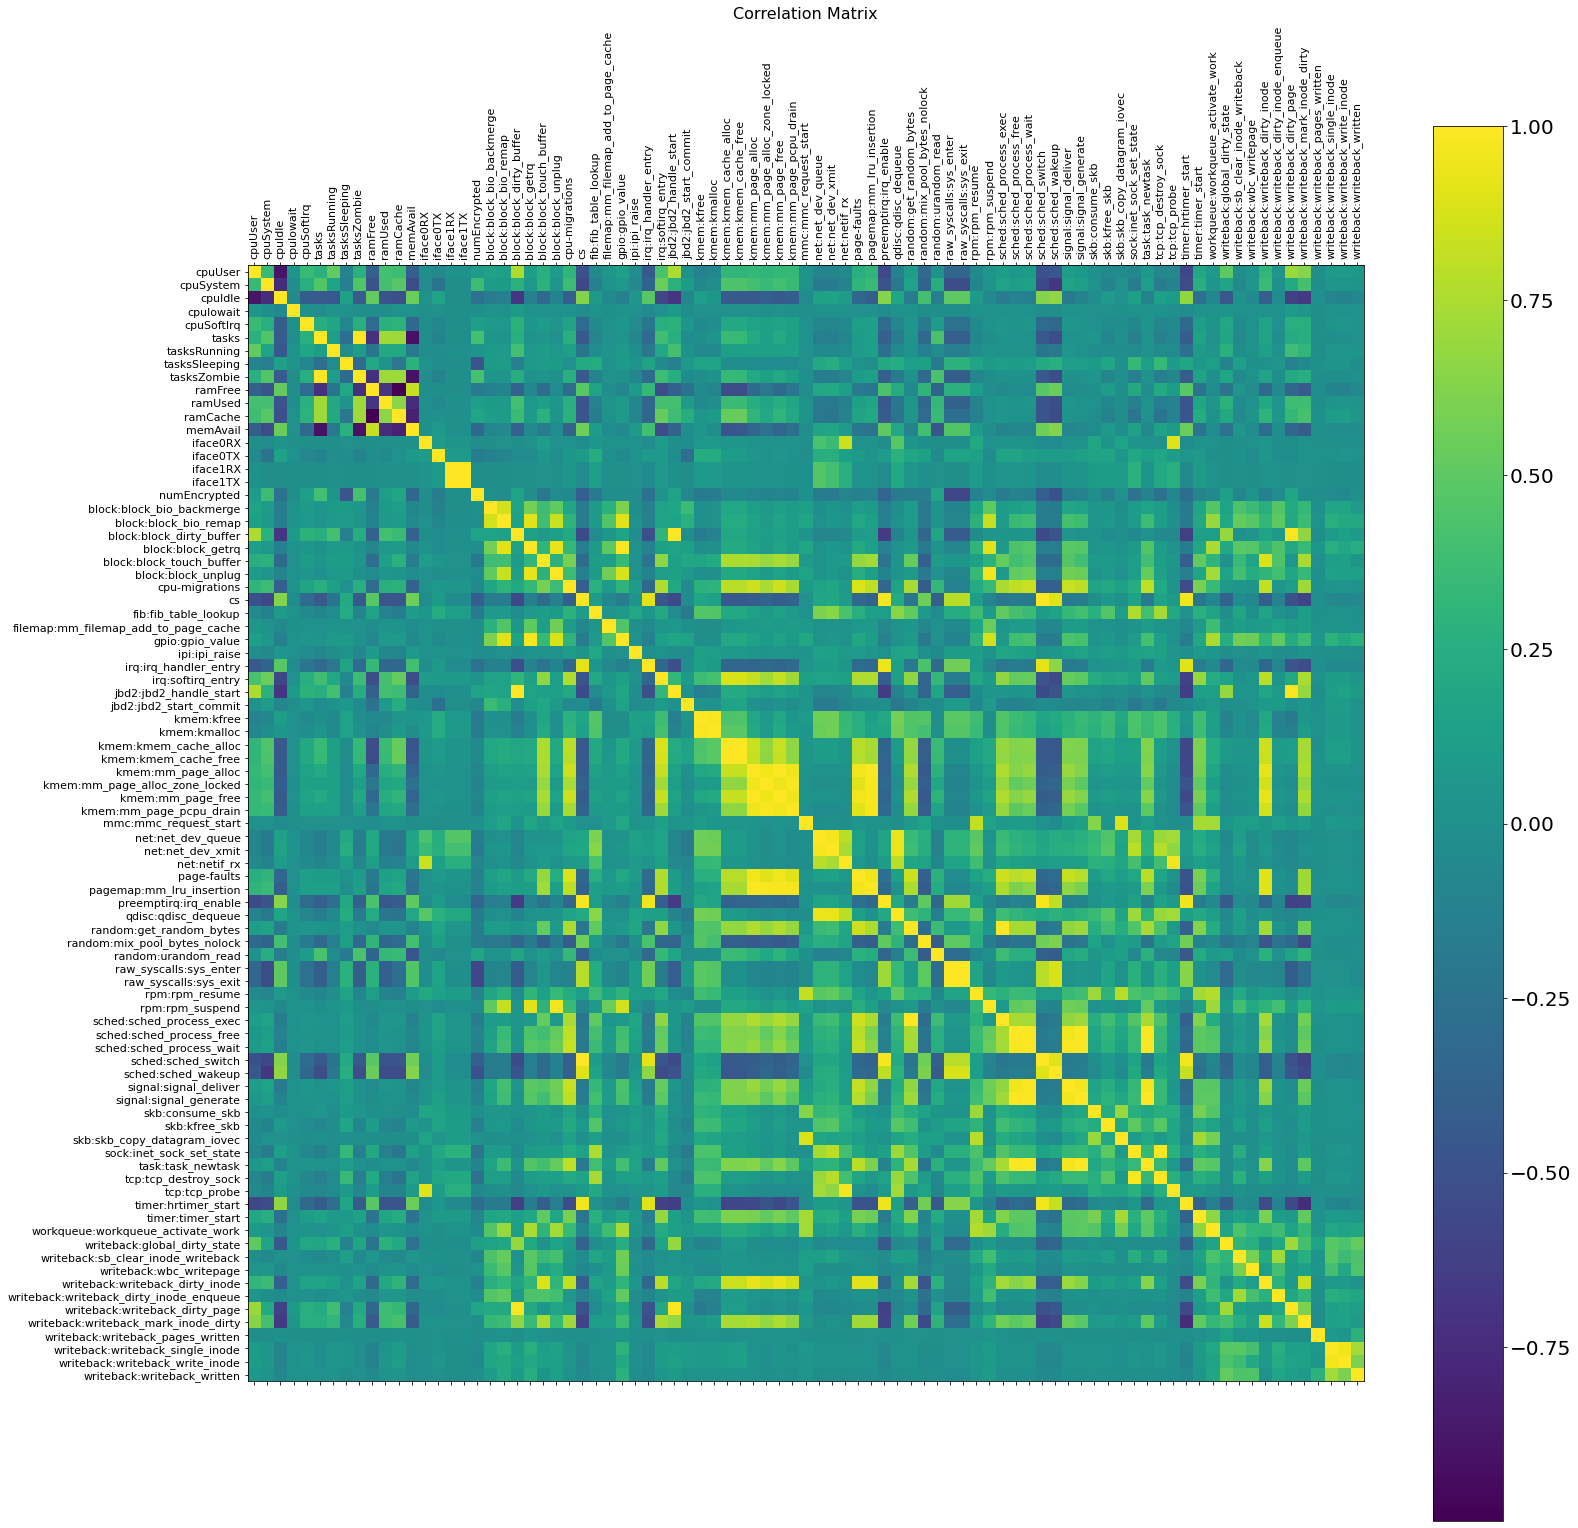

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

correlation_matrix = dataset.corr().abs()

f = plt.figure(figsize=(25, 25))
plt.matshow(dataset.corr(), fignum=f.number)
plt.xticks(range(dataset.select_dtypes(['number']).shape[1]), dataset.select_dtypes(['number']).columns, fontsize=11, rotation=90)
plt.yticks(range(dataset.select_dtypes(['number']).shape[1]), dataset.select_dtypes(['number']).columns, fontsize=11)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=20)
plt.title('Correlation Matrix', fontsize=16);

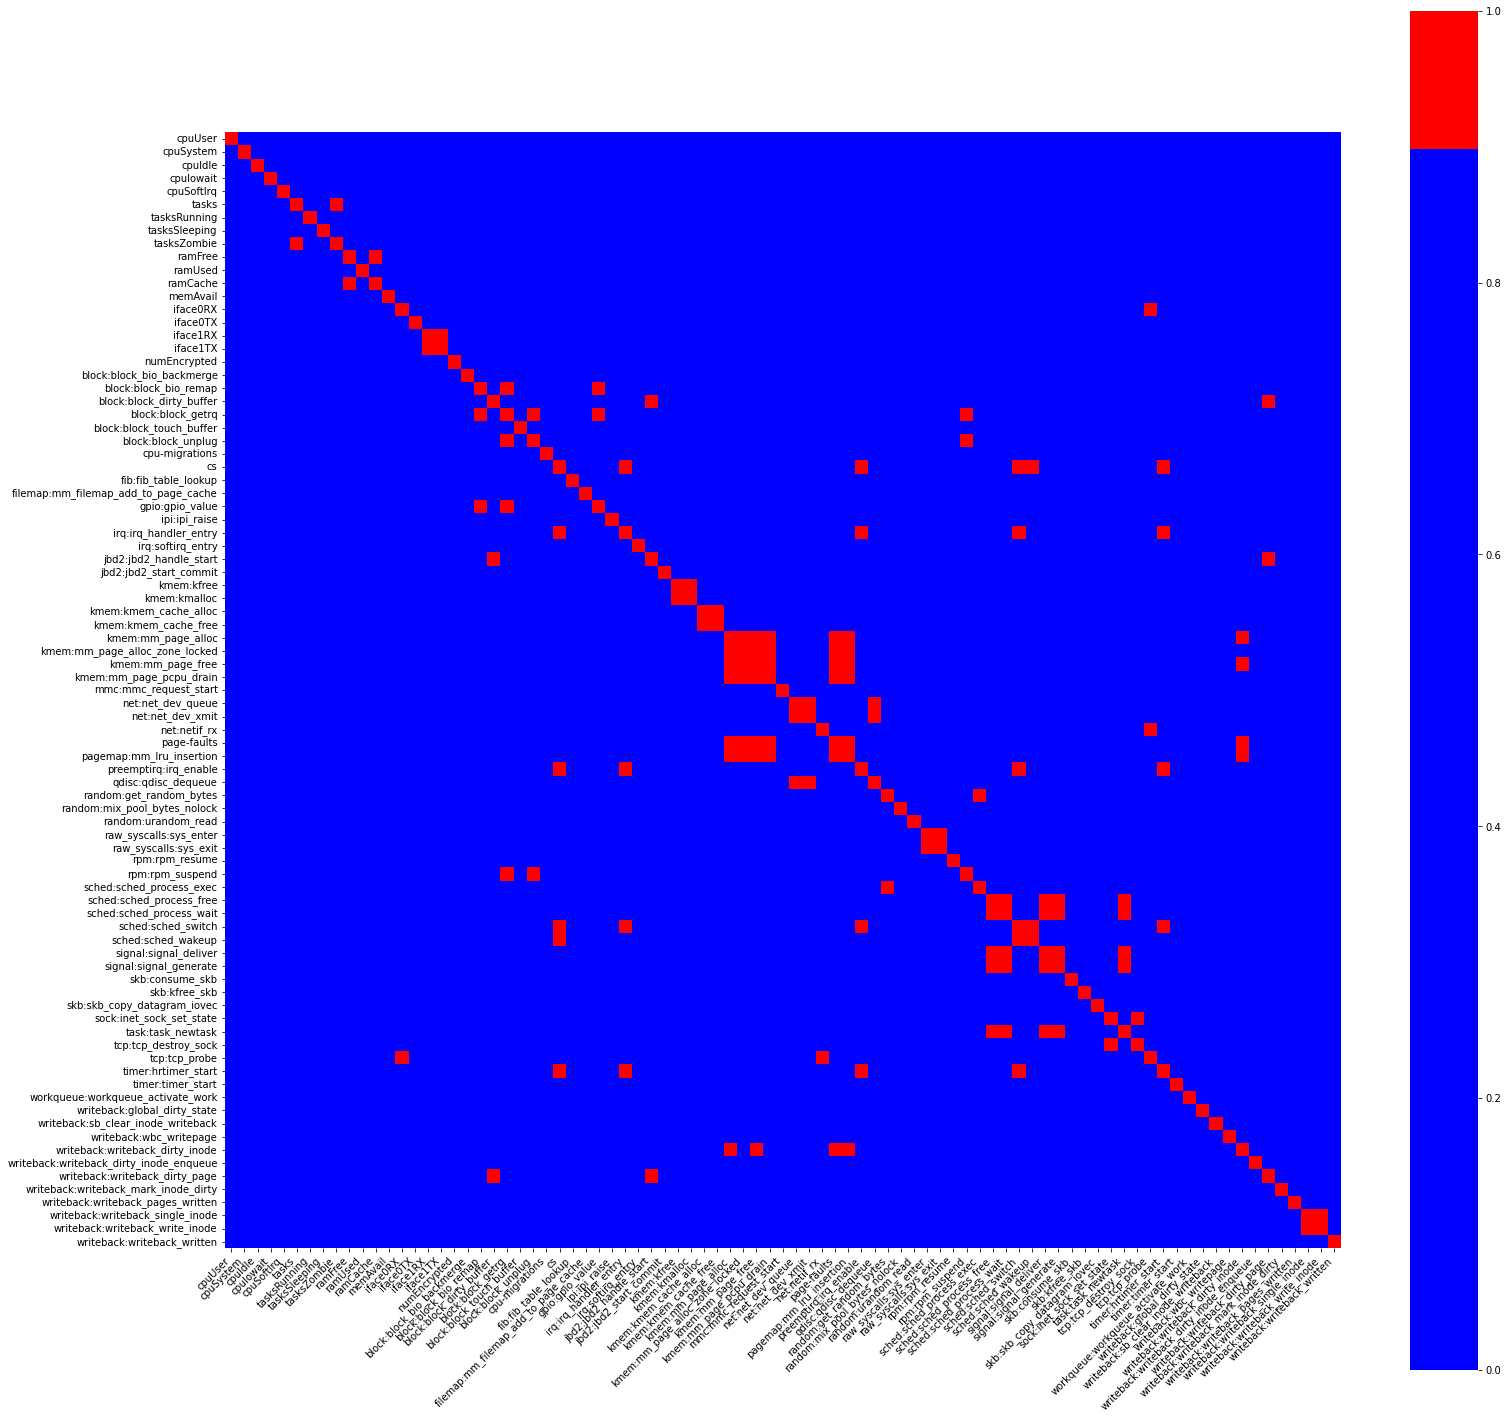

In [11]:
import seaborn as sns
plt.figure(figsize=(25, 25))
from matplotlib.colors import LinearSegmentedColormap

colors = ((0.0, 0.0, 1.0), (1.0, 0.0, 0.0))
cmap = LinearSegmentedColormap.from_list('Custom', colors, len(colors))

ax = sns.heatmap(
    correlation_matrix, 
    vmin=0, vmax=1, center=0.9,
    cmap=cmap,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [12]:
import numpy as np
# get upper triangle of correlation matrix

upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# find features with correlation greater than 0.95

to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(to_drop)
print(len(to_drop))

['tasksZombie', 'ramCache', 'iface1TX', 'gpio:gpio_value', 'jbd2:jbd2_handle_start', 'kmem:kmalloc', 'kmem:kmem_cache_free', 'kmem:mm_page_alloc_zone_locked', 'kmem:mm_page_free', 'kmem:mm_page_pcpu_drain', 'net:net_dev_xmit', 'page-faults', 'pagemap:mm_lru_insertion', 'preemptirq:irq_enable', 'raw_syscalls:sys_exit', 'rpm:rpm_suspend', 'sched:sched_process_exec', 'sched:sched_process_wait', 'sched:sched_switch', 'signal:signal_deliver', 'signal:signal_generate', 'task:task_newtask', 'tcp:tcp_destroy_sock', 'tcp:tcp_probe', 'timer:hrtimer_start', 'writeback:writeback_dirty_page', 'writeback:writeback_write_inode']
27


In [13]:
import numpy as np

# Create correlation matrix
correlation_matrix = dataset.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
#df.drop(to_drop, axis=1, inplace=True)
print(to_drop)
print(len(to_drop))

['cpuIdle', 'tasksZombie', 'ramCache', 'memAvail', 'iface1TX', 'block:block_bio_remap', 'block:block_getrq', 'block:block_unplug', 'gpio:gpio_value', 'irq:irq_handler_entry', 'jbd2:jbd2_handle_start', 'kmem:kmalloc', 'kmem:kmem_cache_alloc', 'kmem:kmem_cache_free', 'kmem:mm_page_alloc', 'kmem:mm_page_alloc_zone_locked', 'kmem:mm_page_free', 'kmem:mm_page_pcpu_drain', 'net:net_dev_xmit', 'net:netif_rx', 'page-faults', 'pagemap:mm_lru_insertion', 'preemptirq:irq_enable', 'qdisc:qdisc_dequeue', 'random:get_random_bytes', 'raw_syscalls:sys_exit', 'rpm:rpm_resume', 'rpm:rpm_suspend', 'sched:sched_process_exec', 'sched:sched_process_free', 'sched:sched_process_wait', 'sched:sched_switch', 'sched:sched_wakeup', 'signal:signal_deliver', 'signal:signal_generate', 'skb:skb_copy_datagram_iovec', 'task:task_newtask', 'tcp:tcp_destroy_sock', 'tcp:tcp_probe', 'timer:hrtimer_start', 'writeback:writeback_dirty_inode', 'writeback:writeback_dirty_page', 'writeback:writeback_mark_inode_dirty', 'writeback

In [15]:
threshold = 0.95
correlations = {}
for this_feature in correlation_matrix:
    #print(row)
    correlations[this_feature] = []
    #print(correlation_matrix[row])
    #for column in correlation_matrix[row]:
    for other_feature, feature_correlation in correlation_matrix[this_feature].iteritems():
        #print(column)
        if this_feature == other_feature:
            continue
        
        if feature_correlation > threshold:
            correlations[this_feature].append(other_feature)
    #print(type(correlation_matrix[row]))
    
n_correlated_features = 0
for this_feature, correlated_features in correlations.items():
    if len(correlated_features) > 0:
        n_correlated_features+=1
        print(f"{this_feature} => {correlated_features}")
print(n_correlated_features)

tasks => ['tasksZombie']
tasksZombie => ['tasks']
ramFree => ['ramCache']
ramCache => ['ramFree']
iface1RX => ['iface1TX']
iface1TX => ['iface1RX']
block:block_dirty_buffer => ['jbd2:jbd2_handle_start', 'writeback:writeback_dirty_page']
block:block_getrq => ['gpio:gpio_value']
block:block_unplug => ['rpm:rpm_suspend']
cs => ['preemptirq:irq_enable', 'sched:sched_switch', 'timer:hrtimer_start']
gpio:gpio_value => ['block:block_getrq']
irq:irq_handler_entry => ['preemptirq:irq_enable']
jbd2:jbd2_handle_start => ['block:block_dirty_buffer', 'writeback:writeback_dirty_page']
kmem:kfree => ['kmem:kmalloc']
kmem:kmalloc => ['kmem:kfree']
kmem:kmem_cache_alloc => ['kmem:kmem_cache_free']
kmem:kmem_cache_free => ['kmem:kmem_cache_alloc']
kmem:mm_page_alloc => ['kmem:mm_page_alloc_zone_locked', 'kmem:mm_page_free', 'page-faults', 'pagemap:mm_lru_insertion']
kmem:mm_page_alloc_zone_locked => ['kmem:mm_page_alloc', 'kmem:mm_page_free', 'kmem:mm_page_pcpu_drain', 'pagemap:mm_lru_insertion']
kmem:m

/var/folders/8v/42fl0kws5cs5j84mbf8mbhbh0000gn/T/ipykernel_88264/2714620909.py:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for other_feature, feature_correlation in correlation_matrix[this_feature].iteritems():


In [23]:
from sklearn.decomposition import PCA

cumulative_explained_variances = {}

for n_components in range (1, 16):
    pca = PCA(n_components=n_components)
    pca.fit(dataset.to_numpy())
    #X_train_pca = pca.fit_transform(X_train_std)
    explained_variance = pca.explained_variance_ratio_
    cumulative_explained_variance = np.sum(explained_variance)
    cumulative_explained_variances[n_components] = cumulative_explained_variance

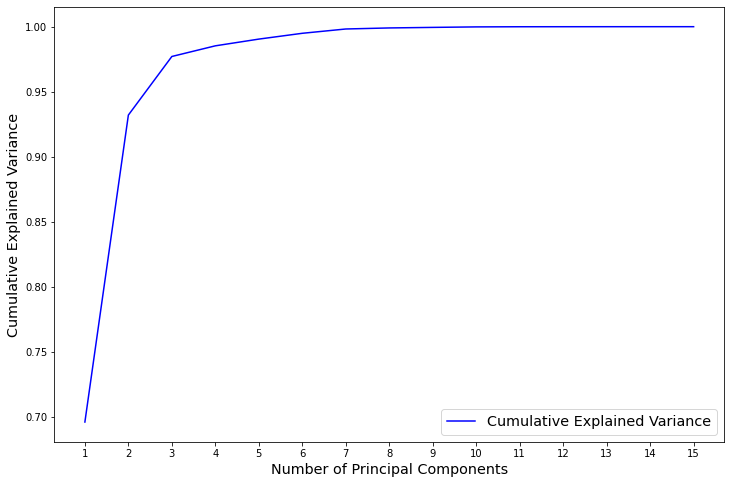

In [27]:
import matplotlib.pyplot as plt

x = list(cumulative_explained_variances.keys())
y = list(cumulative_explained_variances.values())

fontsize = 'x-large'
plt.figure(figsize=(12, 8))
plt.xlabel('Number of Principal Components', fontsize=fontsize)
plt.ylabel('Cumulative Explained Variance', fontsize=fontsize)
plt.xticks(x)
#plt.ylim(0,1)
#plt.axhline(y=0.95, color='black', linestyle='dashed', label='Threshold (95%)')
#plt.plot(x, [0.99]*len(x), color='black', linestyle='dashed', label='Threshold (95%)')
plt.plot(x, y, color='blue', label='Cumulative Explained Variance')
plt.legend(loc='lower right', fontsize=fontsize)
plt.show()

In [28]:
for x, y in cumulative_explained_variances.items():
    print(f"{x} features: {round(y*100,2)}% cumulative explained variance")

1 features: 69.59% cumulative explained variance
2 features: 93.2% cumulative explained variance
3 features: 97.71% cumulative explained variance
4 features: 98.53% cumulative explained variance
5 features: 99.04% cumulative explained variance
6 features: 99.49% cumulative explained variance
7 features: 99.82% cumulative explained variance
8 features: 99.9% cumulative explained variance
9 features: 99.95% cumulative explained variance
10 features: 99.98% cumulative explained variance
11 features: 99.99% cumulative explained variance
12 features: 100.0% cumulative explained variance
13 features: 100.0% cumulative explained variance
14 features: 100.0% cumulative explained variance
15 features: 100.0% cumulative explained variance


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#X_train_std = train_data_pca[:, :-1]

pca = PCA(n_components=8)
pca.fit(dataset.to_numpy())
#X_train_pca = pca.fit_transform(X_train_std)

# Determine explained variance using explained_variance_ration_ attribute
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

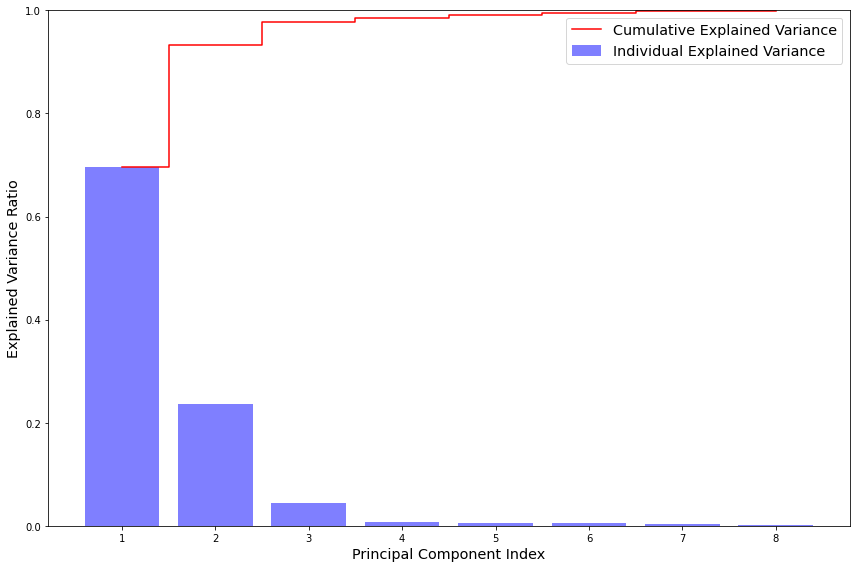

In [30]:
# Create the visualization plot
fontsize = 'x-large'
plt.figure(figsize=(12, 8))
plt.xticks(range(1, len(exp_var_pca)+1, 1))
plt.yticks(np.linspace(0,1,6))
plt.ylim(0,1)
plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, alpha=0.5, align='center', color='blue', label='Individual Explained Variance')
plt.step(range(1,len(cum_sum_eigenvalues)+1), cum_sum_eigenvalues, where='mid', color='red', label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio', fontsize=fontsize)
plt.xlabel('Principal Component Index', fontsize=fontsize)
plt.legend(loc='best', fontsize=fontsize)
plt.tight_layout()
plt.show()